# Chapter 03 - Exercise

We need the following modules to do the exercise 



- `numpy`: used for numerical analysis 
- `pandas`: used to enable dataframe functionality (uses numpy under the hood)
- `matplotlib`: basic plotting functionality
- `seaborn`: uses matplotlib and includes functionality for many common plots
- `statsmodels`: used to fit statistical models (such as linear regression)

All modules have further information and tutorials on their respective websites

Note that typically
-  modules are important and than given a "nickname" (import ... as nickname) to avoid writing lengthy names
-  all modules are imported at the top of a notebook. This is not required but good practice so we can immediately see which modules are required to run the code

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import scipy.stats as stats

## Description of data and excercise

The dataset contained in the below link has the following variables:

- `mpg` = miles per gallon
- `cylinders` = number of cylinders 
- `displacement` = overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- `horsepower` = gross horsepower
- `weight` = weight of the car in lbs
- `acceleration`= time in seconds to 100mph
- `year` = year model was produced
- `origin` = region (1=US, 2=Europe, 3=Asia)
- `name` = name of model


**Excercise:**

- load the data set
- remove all variables except `mpg`, `cylinders`, `horsepower` and `weight`
- show descriptive statistics of each variable
- make a plot showing distributino of each variable and relationship between each variable (tip: use seaborn's `pairplot`)
- using a linear regression model analyse what drives `mpg`
- calculate **MAPE** of your model and plot the difference between `mpgs` and `predicted mps`


### Load data set and remove variables not needed

Two general approaches

1. load only data needed

2. load entire data set and remove columns not needed

Depening on your analysis both approaches may be useful.

#### Option 1

In [3]:
link = "https://raw.githubusercontent.com/fredzett/Notebooks/master/Auto.csv"
df = pd.read_csv(link, usecols=["mpg", "cylinders", "horsepower", "weight" ])

#### Option 2

In [8]:
link = "https://raw.githubusercontent.com/fredzett/Notebooks/master/Auto.csv"
df = pd.read_csv(link)
df = df[["mpg", "cylinders", "horsepower", "weight" ]] # or df.loc[:,[...]], or df.filter(items=[...])
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


### Show descriptive statistics

- use `df.describe()` for quick overview of count, mean, median (50%) etc.
- use `scipy.stats` for more specific statistics (e.g. to calculate skewness or kurtosis of variables)

In [4]:
df.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [10]:
stats.kurtosis(df)

array([-0.52470258, -1.39569522,  0.67282189, -0.81424118])

### Plot distribution of and relation between variables

- use `seaborn`'s `sns.pairplot(...)` for quick overview
- use specific plots from seaborn for individual analysis

#### Seaborn's pairplot

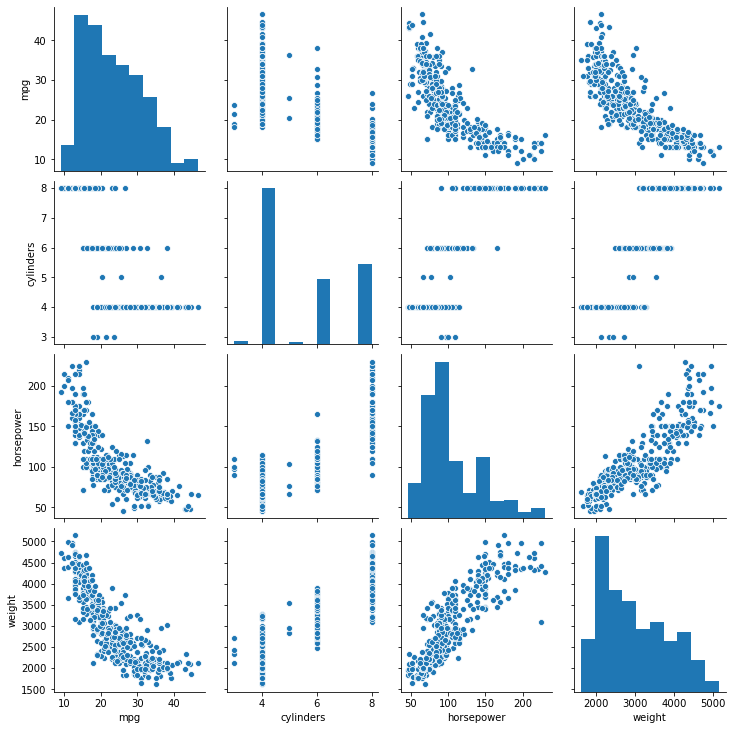

In [16]:
sns.pairplot(df) # Standard pairplot

#### Specific indivdiual plots using seaborn

see [here](https://seaborn.pydata.org/) for more details on available plots and tutorials

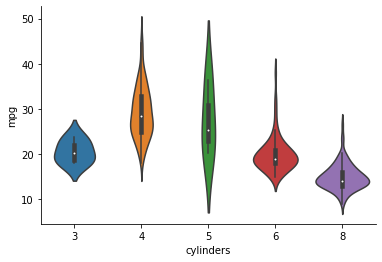

In [14]:
sns.violinplot(x="cylinders", y="mpg", data=df)
sns.despine()

### Build linear regression model

Two ways to do this:

- for inference and learning about significance of coefficients etc: use `smf.ols()`
- if you only want to predict: use `sklearn`

Results are the same. 

#### Option 1: using statsmodels (`smf`)

In [37]:
model1 = smf.ols("mpg ~ cylinders + horsepower + weight", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     313.1
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.22e-103
Time:                        17:00:13   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     388   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7368      0.796     57.461      0.000      44.172      47.302
cylinders     -0.3890      0.299     -1.302      0.194      -0.977       0.199
horsepower    -0.0427      0.012     -3.677      0.000      -0.066      -0.020
weight        -0.0053      0.001     -8.208      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       37.624   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.959
Skew:                           0.697   Prob(JB):                     8.60e-12
Kurtosis:                       4.085   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Option 2: using `sklearn` for 

In [38]:
from sklearn.linear_model import LinearRegression # note: imported here, because not needed for this exercise

X, y = df.drop(labels="mpg", axis=1), df["mpg"] # define X and y
model2 = LinearRegression()
model2.fit(X,y)

LinearRegression()

### Calculate MAPE



In [39]:
def mape(y,yhat):
    return 1/len(y) * np.sum(np.abs((y - yhat)/y))

### Plot mpg vs. mpg_predicted

In [43]:
# Using smf
mpg_predicted_smf = model1.fittedvalues
df["yhat1"] = mpg_predicted_smf

# Using sklearn

mpg_predicted_sklear = model2.predict(X)
df["yhat2"] = mpg_predicted_sklear


print("MAPE from smf-Model", mape(df["mpg"], df["yhat1"]))
print("MAPE from sklearn-Model", mape(df["mpg"], df["yhat2"]))

MAPE from smf-Model 0.14140203094366233
MAPE from sklearn-Model 0.14140203094366666


#### Plot using prediction from `smf`

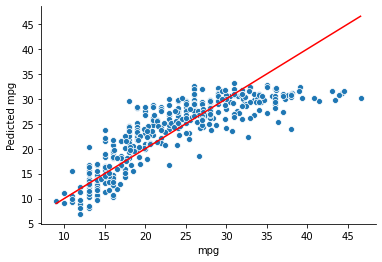

In [46]:
sns.scatterplot(x="mpg", y="yhat1",data=df, )
sns.lineplot(x="mpg", y="mpg", data=df, color="red")
plt.ylabel("Pedicted mpg")
sns.despine()

#### Plot using predictions from `sklearn`

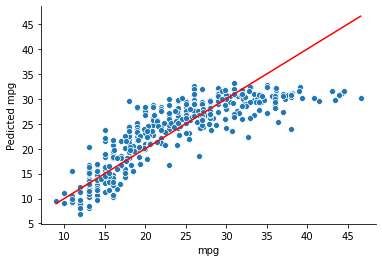

In [48]:
sns.scatterplot(x="mpg", y="yhat2",data=df)
sns.lineplot(x="mpg", y="mpg", data=df, color="red")
plt.ylabel("Pedicted mpg")
sns.despine()